# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Data Overview

- Observations
- Sanity checks

In [ ]:
df1 = pd.read_csv(r'ExtraaLearn.csv')
df = df1.copy()
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [ ]:
df[df.duplicated()=='True'].count()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

##Observations:

**1.** **No Null** Values.

**2.** **Mean age** is **46** years old while **ranging** from **18** years to **63** years.

**3.** **Mean website visits** is **3.5** times while **ranging** from **0** to **30** times.

**4.** **Mean time spent on the website** is **724** mins (**12** hours and **4** mins) while **ranging** from **0** mins to **2537** mins (**42** hours and **17** mins).

**5.** **Mean page views per visit** is **3** while **ranging** from **0** to **18.4** .

**6.** There are **no duplicates**.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.dtypes

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

In [ ]:
cate_col = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media',
            'educational_channels','referral','status']

for col in cate_col:
  print(df[col].value_counts(1))
  print('-'*20)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
--------------------
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
--------------------
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
--------------------
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
--------------------
No     0.979835
Yes    0.020165
Name: referral, dtype: float64
--------------------
0    0.701431
1    0.298569
Name: status,

## Observations:

**1.** In terms of **current occupation**, **56.72%** are **Professionals**, **31.24%** are **Unemployed** and remaining **12.03%** are **Students**.

**2.** In terms of **first interaction**, **55.11%** had their **first interaction** via **Website** while remaining **44.88%** accessed via **Mobile App**.

**3.** In terms of **profile completion**, **49.09%** had ***high* profile completion**, **48.59%** had **medium** while remaining **2.32%** had ***low* profile completion**.

**4.** In terms of **last activity**, **49.39%** had **Email Activity**, **26.76%** had **Phone Activity** and remaining **23.85%** had **Website Activity**.

**5.** In terms of **Newspaper ad**, **89.22%** have **not seen** the ad of **ExtraaLearn** while **10.78%** have **seen** it.

**6.** In terms of **Magazine ad**, **94.95%** have **not seen** the ad of **ExtraaLearn** while **5.05%** have **seen** it.

**7.** In terms of **digital platform ad**, **88.57%** have **not seen** the ad of **ExtraaLearn** while **11.43%** have **seen** it.

**8.** In terms of **educational channels**, **84.71%** have **not heard** about **ExtraaLearn** while **15.29%** have **heard** it.

**9.** In terms of **reference**, **97.98%** have **not heard** about **ExtraaLearn** while **2.02%** have **heard** it.

**10.** In terms of **lead conversion to paid customer**, **70.14%** are still **unpaid customers** while **29.86%** are successfully converted to **paid customers**.

## Univariate Analysis:

### Categorical variables:

#### Current Occupation:

In [ ]:
current_occupation_counts = df['current_occupation'].value_counts()
current_occupation_percentage = (current_occupation_counts/len(df))*100
print("Number of leads by current occupation: ")
print(current_occupation_counts)
print('-'*50)
print("Percentage of leads by current occupation: ")
print(f"{np.round(current_occupation_percentage,2)}")

Number of leads by current occupation: 
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Percentage of leads by current occupation: 
Professional    56.72
Unemployed      31.24
Student         12.03
Name: current_occupation, dtype: float64


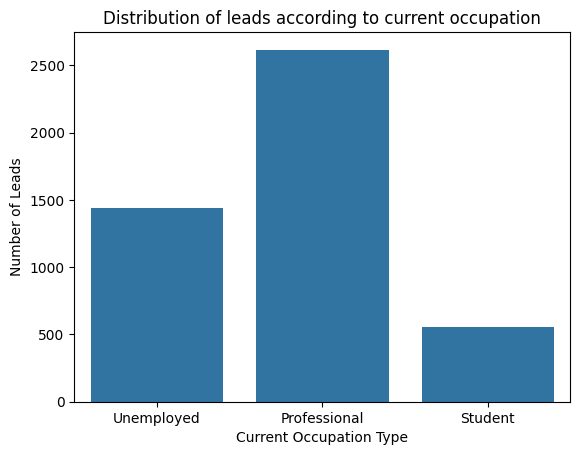

In [ ]:
sns.countplot(x="current_occupation", data=df)
plt.xlabel("Current Occupation Type")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to current occupation")
plt.show()

#### First Interaction:

In [ ]:
first_interaction_counts = df['first_interaction'].value_counts()
first_interaction_percentage = (first_interaction_counts/len(df))*100
print("Number of leads by first interaction: ")
print(first_interaction_counts)
print('-'*50)
print("Percentage of leads by first interaction: ")
print(f"{np.round(first_interaction_percentage,2)}")

Number of leads by first interaction: 
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
Percentage of leads by first interaction: 
Website       55.12
Mobile App    44.88
Name: first_interaction, dtype: float64


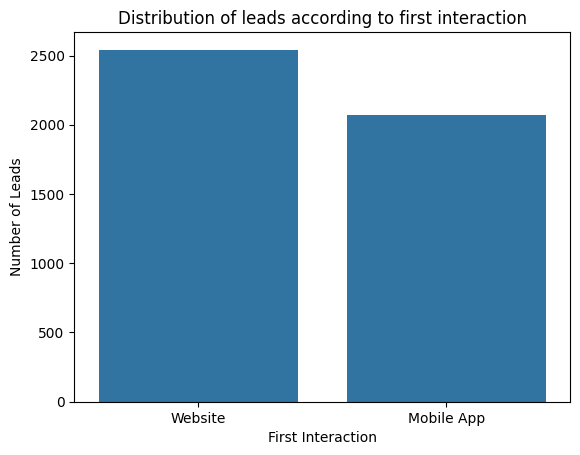

In [ ]:
sns.countplot(x="first_interaction", data=df)
plt.xlabel("First Interaction")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to first interaction")
plt.show()

#### Profile Completed:

In [ ]:
profile_completed_counts = df['profile_completed'].value_counts()
profile_completed_percentage = (profile_completed_counts/len(df))*100
print("Number of leads by profile completed: ")
print(profile_completed_counts)
print('-'*50)
print("Percentage of leads by profile_completed: ")
print(f"{np.round(profile_completed_percentage,2)}")

Number of leads by profile completed: 
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Percentage of leads by profile_completed: 
High      49.09
Medium    48.59
Low        2.32
Name: profile_completed, dtype: float64


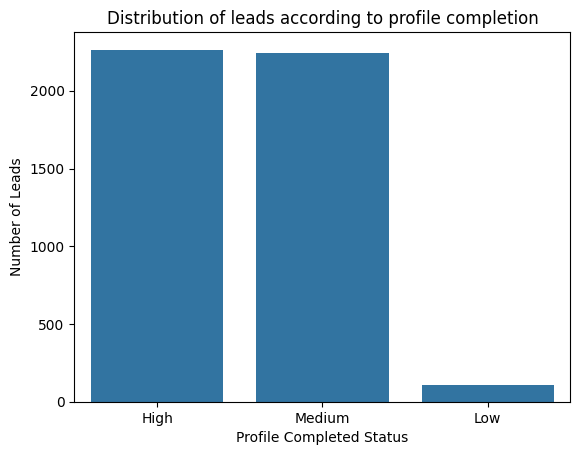

In [ ]:
sns.countplot(x="profile_completed", data=df)
plt.xlabel("Profile Completed Status")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to profile completion")
plt.show()

#### Last Activity:

In [ ]:
last_activity_counts = df['last_activity'].value_counts()
last_activity_percentage = (last_activity_counts/len(df))*100
print("Number of leads by last activity: ")
print(last_activity_counts)
print('-'*50)
print("Percentage of leads by last activity: ")
print(f"{np.round(last_activity_percentage,2)}")

Number of leads by last activity: 
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
Percentage of leads by last activity: 
Email Activity      49.39
Phone Activity      26.76
Website Activity    23.85
Name: last_activity, dtype: float64


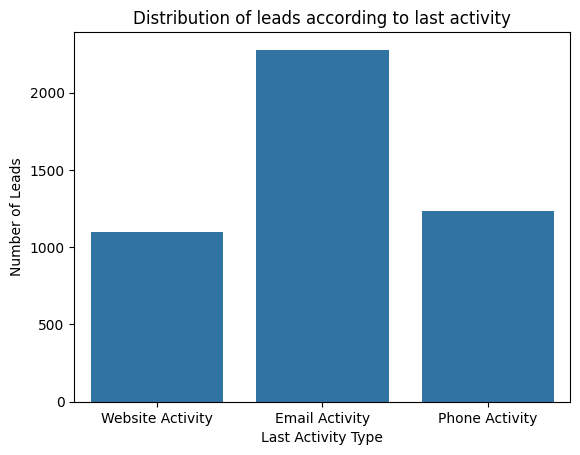

In [ ]:
sns.countplot(x="last_activity", data=df)
plt.xlabel("Last Activity Type")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to last activity")
plt.show()

#### Newspaper ad:

In [ ]:
print_media_type1_counts = df['print_media_type1'].value_counts()
print_media_type1_percentage = (print_media_type1_counts/len(df))*100
print("Number of leads by seen newspaper ad or not: ")
print(print_media_type1_counts)
print('-'*50)
print("Percentage of leads by seen newspaper ad or not: ")
print(f"{np.round(print_media_type1_percentage,2)}")

Number of leads by seen newspaper ad or not: 
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
Percentage of leads by seen newspaper ad or not: 
No     89.22
Yes    10.78
Name: print_media_type1, dtype: float64


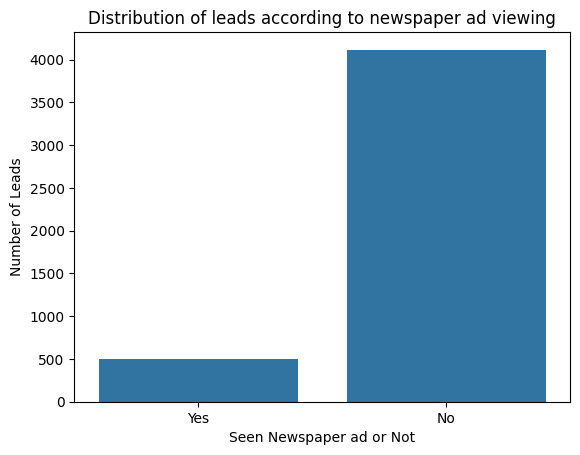

In [ ]:
sns.countplot(x="print_media_type1", data=df)
plt.xlabel("Seen Newspaper ad or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to newspaper ad viewing")
plt.show()

#### Magazine ad:

In [ ]:
print_media_type2_counts = df['print_media_type2'].value_counts()
print_media_type2_percentage = (print_media_type2_counts / len(df))*100
print("Number of leads by seen ad or not: ")
print(print_media_type2_counts)
print('-'*50)
print("Percentage of leads by seen ad or not: ")
print(np.round(print_media_type2_percentage,2))

Number of leads by seen ad or not: 
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
Percentage of leads by seen ad or not: 
No     94.95
Yes     5.05
Name: print_media_type2, dtype: float64


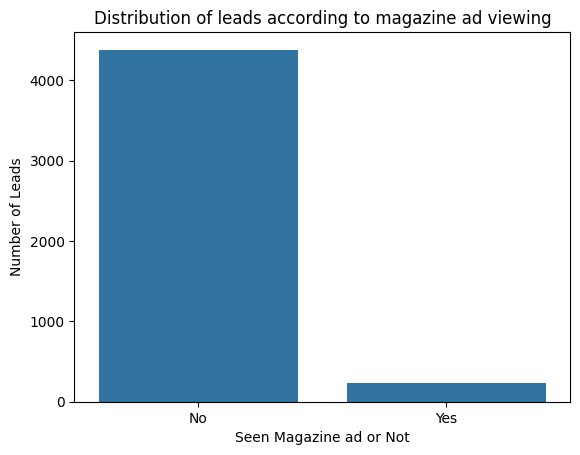

In [ ]:
sns.countplot(x="print_media_type2", data=df)
plt.xlabel("Seen Magazine ad or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to magazine ad viewing")
plt.show()

#### Digital Media:

In [ ]:
digital_media_counts = df['digital_media'].value_counts()
digital_media_percentage = (digital_media_counts / len(df))*100
print("Number of leads by seen ad or not: ")
print(digital_media_counts)
print('-'*50)
print("Percentage of leads by seen ad or not: ")
print(np.round(digital_media_percentage,2))

Number of leads by seen ad or not: 
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
Percentage of leads by seen ad or not: 
No     88.57
Yes    11.43
Name: digital_media, dtype: float64


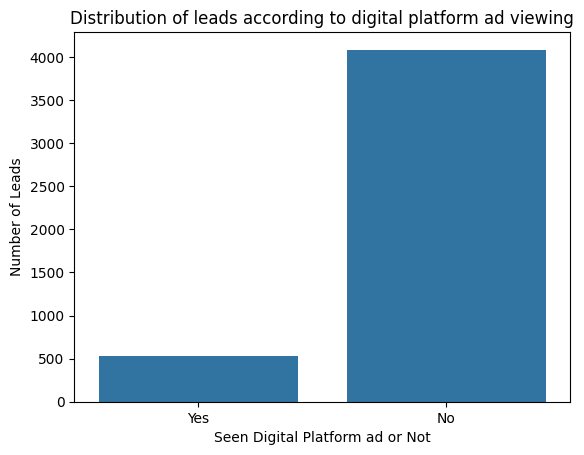

In [ ]:
sns.countplot(x="digital_media", data=df)
plt.xlabel("Seen Digital Platform ad or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to digital platform ad viewing")
plt.show()

#### Educational Channels:

In [ ]:
educational_channels_counts = df['educational_channels'].value_counts()
educational_channels_percentage = (educational_channels_counts / len(df))*100
print("Number of leads by seen ad or not: ")
print(educational_channels_counts)
print('-'*50)
print("Percentage of leads by seen ad or not: ")
print(np.round(educational_channels_percentage,2))

Number of leads by seen ad or not: 
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------------------------------
Percentage of leads by seen ad or not: 
No     84.71
Yes    15.29
Name: educational_channels, dtype: float64


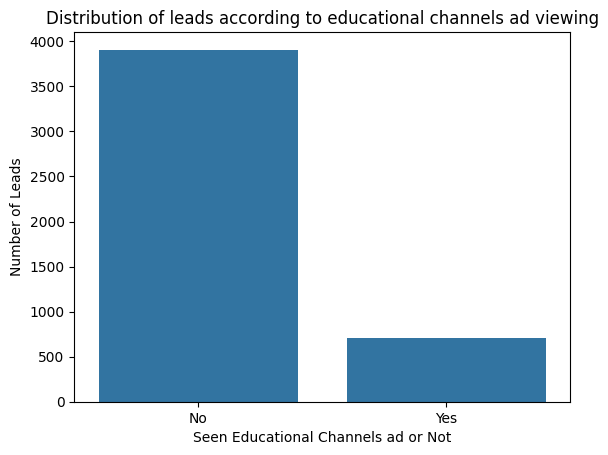

In [ ]:
sns.countplot(x="educational_channels", data=df)
plt.xlabel("Seen Educational Channels ad or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to educational channels ad viewing")
plt.show()

#### Referral:

In [ ]:
referral_counts = df['referral'].value_counts()
referral_percentage = (referral_counts / len(df))*100
print("Number of leads by heard through reference or not: ")
print(referral_counts)
print('-'*50)
print("Percentage of leads by heard through reference or not: ")
print(np.round(referral_percentage,2))

Number of leads by heard through reference or not: 
No     4519
Yes      93
Name: referral, dtype: int64
--------------------------------------------------
Percentage of leads by heard through reference or not: 
No     97.98
Yes     2.02
Name: referral, dtype: float64


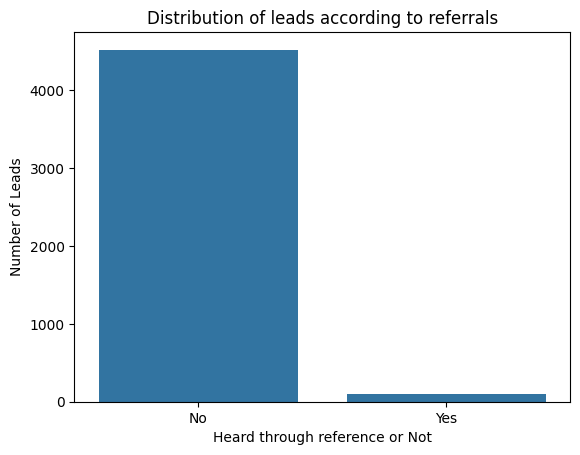

In [ ]:
sns.countplot(x="referral", data=df)
plt.xlabel("Heard through reference or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to referrals")
plt.show()

#### Status:

In [ ]:
status_counts = df['status'].value_counts()
status_percentage = (status_counts / len(df))*100
print("Number of leads converted to paid customer or not: ")
print(status_counts)
print('-'*50)
print("Percentage of leads converted to paid customer or not: ")
print(np.round(status_percentage,2))

Number of leads converted to paid customer or not: 
0    3235
1    1377
Name: status, dtype: int64
--------------------------------------------------
Percentage of leads converted to paid customer or not: 
0    70.14
1    29.86
Name: status, dtype: float64


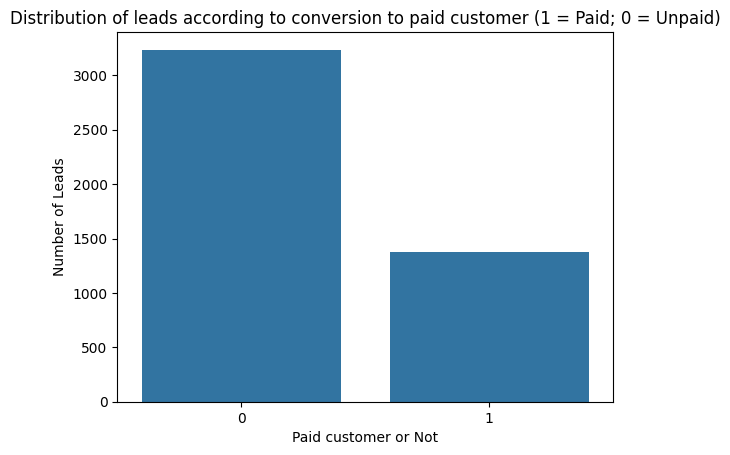

In [ ]:
sns.countplot(x="status", data=df)
plt.xlabel("Paid customer or Not")
plt.ylabel("Number of Leads")
plt.title("Distribution of leads according to conversion to paid customer (1 = Paid; 0 = Unpaid)")
plt.show()

### Numerical variables:

#### Age:

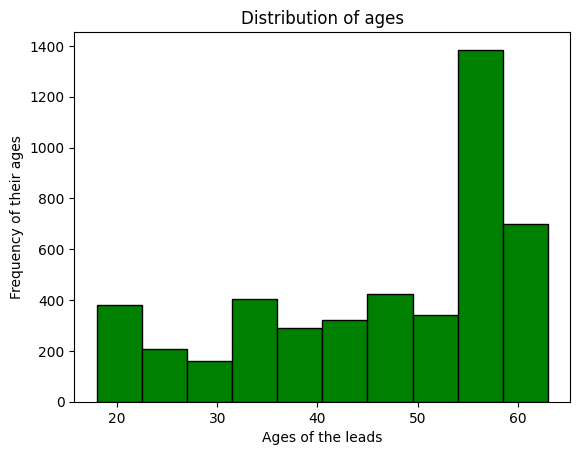

In [ ]:
plt.hist(df['age'],color="green",edgecolor="black")
plt.xlabel("Ages of the leads")
plt.ylabel("Frequency of their ages")
plt.title("Distribution of ages")
plt.show()

In [ ]:
px.box(df,y="age",title="Distribution of ages")

The above **boxplot** represents:

**1.** **q1** = **36**. It indicates that **25%** of the leads are **younger than or equal to 36** years old.

**2.** **q2** = **51**. It indicates that **50%** of the leads are **younger than or equal to 51** years old, and the **other 50%** are **older than or equal to 51** years old.

**3.** **q3** = **57**. It indicates that **75%** of the leads are **younger than or equal to 57** years old, and the **remaining 25%** are **older than 57** years old.

**4.** The **right whisker** (here, **top**) is **shorter** than the **left whisker** (here, **bottom**) which suggests a **negative skewness** or the boxplot is **left-skewed**.

#### Website Visits:

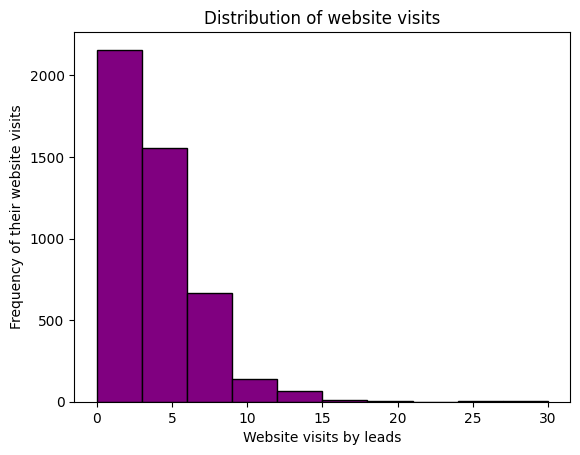

In [ ]:
plt.hist(df['website_visits'],color="purple",edgecolor="black")
plt.xlabel("Website visits by leads")
plt.ylabel("Frequency of their website visits")
plt.title("Distribution of website visits")
plt.show()

In [ ]:
px.box(df,y='website_visits',title="Distribution of website visits")

The above **boxplot** represents:

**1.** **q1** = **2**. It indicates that **25%** of the leads have visited the website **2 times or less**.

**2.** **q2** = **3**. It indicates that **50%** of the leads have visited the website **3 times or less** and the **other 50%** have visited **more than 3 times**.

**3.** **q3** = **5**. It indicates that **75%** of the leads have visited the website **5 times or less**, and the **remaining 25%** have visited **more than 5 times**.

**4.** The **left whisker** is **shorter** than the **right whisker** and hence the **boxplot** is **positively skewed** or shows **right skewness**.

**5.** The **boxplot** shows a **lot of outliers**. (**approx. 17 outliers**).

#### Time spent on website:

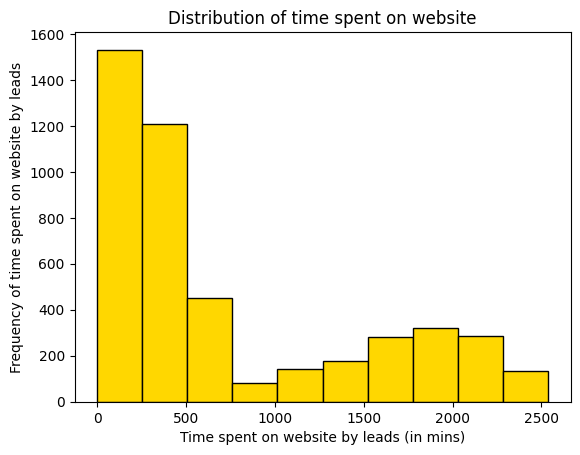

In [ ]:
plt.hist(df['time_spent_on_website'],color="gold",edgecolor="black")
plt.xlabel("Time spent on website by leads (in mins)")
plt.ylabel("Frequency of time spent on website by leads")
plt.title("Distribution of time spent on website")
plt.show()

In [ ]:
px.box(df,y="time_spent_on_website",title="Distribution of time spent on website")

The above **boxplot** represents:

**1.** **q1** = **148.5 mins**. It indicates that **25%** of the leads have spent **148.5 mins or less** on the website.

**2.** **q2** = **376 mins**. It indicates that **50%** of the leads have spent **376 mins or less** and the **other 50%** have spent **more than 376 mins**.

**3.** **q3** = **1337.5 mins**. It indicates that **75%** of the leads have spent **1337.5 mins or less** on the website, and the **remaining 25%** have spent **more than 1337.5 mins**.

**4.** Since, **left whisker** is **shorter** than the **right whisker**, the **boxplot** is **right skewed** or shows **positive skewness**.

#### Page views per visit:

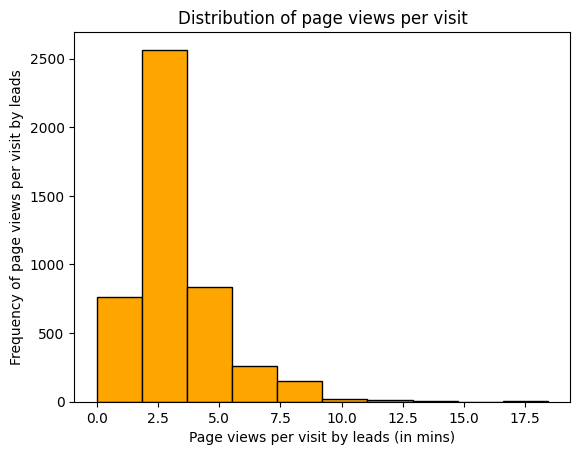

In [ ]:
plt.hist(df['page_views_per_visit'],color="orange",edgecolor="black")
plt.xlabel("Page views per visit by leads (in mins)")
plt.ylabel("Frequency of page views per visit by leads")
plt.title("Distribution of page views per visit")
plt.show()

In [ ]:
px.box(df,y="page_views_per_visit",title="Distribution of page views per visit")

The above **boxplot** represents:

**1. q1** = **2.08**. This indicates that **25%** of the leads had **2.08 or less page views per visit**.

**2. q2** = **2.79**. This indicates that **50% had 2.79 or less page views per visit** and **remaining 50% had more than 2.79 page views per visit.**

**3. q3** = **3.76**. This indicates that **75% had 3.76 or less page views per visit** and **remaining 25% had more than 3.76 page views per visit.**

**4.** There are a **lot** of **outliers**.

## Bivariate Analysis:

#### Categories with respect to age:

##### Current occupation vs age:

In [ ]:
fig = px.box(df,x="current_occupation",y="age")
fig.update_layout(
    xaxis_title = "Current occupation type",
    yaxis_title = "Age (in years)",
    title = "Boxplot of Age by Current Occupation",
    title_x = 0.5 # To put title in the center
)
fig.show()

The above **boxplot** represents:

**Unemployed:**

**1.** **q1** = **42**. This indicates that **25%** of the leads are **42 years old or younger**.

**2. q2** = **54**. This indicates that **50%** are **54 years old or younger** and the **other 50% are older than 54**.

**3. q3** = **58**. This indicates that **75%** are **58 years old or younger** while **remaining 25% are older than 58**.

**Professional:**

**Similar** to Unemployed (Since some values **overlap**).

**Student:**

**1. q1** = **19**. This indicates that **25%** of the leads are **19 years old or younger**.

**2. q2** = **21**. This indicates that **50% are 21 years old or younger** and the **other 50% are older than 21**.

**3. q3** = **23**. This indicates that **75% are 23 years old or younger** and **remaining 25% are older than 23**.

##### First interaction vs age:

In [ ]:
fig = px.box(df,x="first_interaction",y="age")
fig.update_layout(
    xaxis_title = "First Interaction",
    yaxis_title = "Age (in years)",
    title = "Boxplot of Age by First Interaction",
    title_x = 0.5 # To put title in the center
)
fig.show()

The above **boxplot** represents:

**Website:**

**1. q1** = **35**. This indicates that **25%** of the leads who had their **first interaction on website** are **35 years old or younger**.

**2. q2** = **51**. This indicates that **50%** of the leads who had their **first interaction on website** are **51 years old or younger** and **remaining 50% are older than 51**.

**3. q3** = **57**. This indicates that **75%** of the leads who had their **first interaction on website** are **57 years old or younger** and **remaining 25% are older than 57**.

**Mobile App:**

**Similarly** for **Mobile App**.

##### Profile completion vs age:

In [ ]:
fig = px.box(df,x="profile_completed",y="age")
fig.update_layout(
    xaxis_title = "Profile completion",
    yaxis_title = "Age (in years)",
    title = "Boxplot of Age by Profile Completion",
    title_x = 0.5 # To put title in the center
)
fig.show()

The above **boxplot** represents:

**High:**

**1. q1** = **36**. This indicates that **25%** of the leads with **high profile completion** are **36 years old or younger**.

**2. q2** = **52**. This indicates that **50%** of the leads with **high profile completion** are **52 years old or younger** and the **remaining 50% are older than 52**.

**3. q3** = **57**. This indicates that **75%** of the leads with **high profile completion** are **57 years old or younger** and the **remaining 25% are older than 57**.

**Similarly** for **Medium** and **Low**.

##### Last activity vs age:

In [ ]:
fig = px.box(df,x="last_activity",y="age")
fig.update_layout(
    xaxis_title = "Last Activity",
    yaxis_title = "Age (in years)",
    title = "Boxplot of Age by Last Activity",
    title_x = 0.5 # To put title in the center
)
fig.show()

The above **boxplot** represents:

**Website Activity:**

**1. q1** = **36**. This indicates that **25%** of the leads that had their **last activity as website activity** are **36 years old or younger**.

**2. q2** = **51**. This indicates that **50%** of the leads are **51 years old or younger** and **remaining 50% are older than 51**.

**3. q3** = **57**. This indicates that **75%** of the leads are **57 years old or younger** and **remaining 25% are older than 57**.

**Similarly** for **Email Activity** and **Phone Activity**.

##### Status vs age:

In [ ]:
fig = px.box(df,x="status",y="age")
fig.update_layout(
    xaxis_title = "Status (1=Paid, 0=Unpaid)",
    yaxis_title = "Age (in years)",
    title = "Boxplot of Age by Conversion status",
    title_x = 0.5 # To put title in the center
)
fig.show()

The above **boxplot** represents:

**Unpaid (Class 0):**

**1. q1** = **33**. This indicates that **25%** of the leads that are **unpaid customers**, are **33 years old or younger**.

**2. q2** = **49**. This indicates that **50%** of the leads are **49 years old or younger** and the **remaining 50% are older than 49**.

**3. q3** = **57**. This indicates that **75%** of the leads are **57 years old or younger** and the **remaining 25% are older than 57**.

**Similarly** for **Paid customers (Class 1)**.

We can do the boxplot with other categorical columns and numerical columns to extract other insights.

## **To answer the above questions, we do some analysis:**

#### Current occupation vs status:

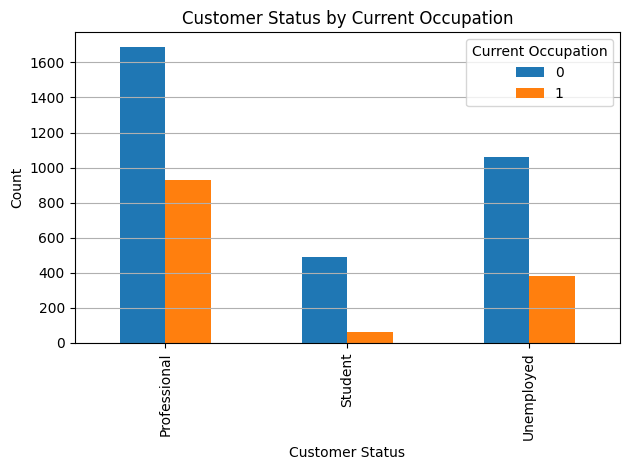

In [ ]:
occupation_groups = df.groupby('current_occupation')
occupation_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Current Occupation")
plt.legend(title="Current Occupation")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

With the above comparison, we can see that professional, student and unemployed are more likely to become **unpaid** customers.

## First Interaction vs Status:

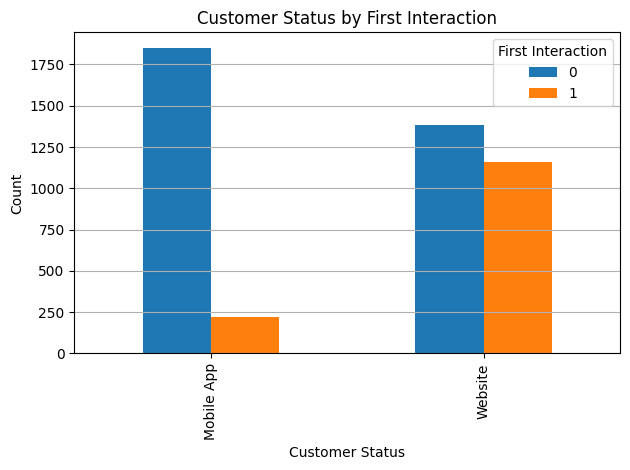

In [ ]:
first_interaction_groups = df.groupby('first_interaction')
first_interaction_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by First Interaction")
plt.legend(title="First Interaction")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

With the above comparison, we can see that Mobile App first interaction leads and Website first interaction leads are more likely to become **unpaid** customers.

## Last activity vs Status:

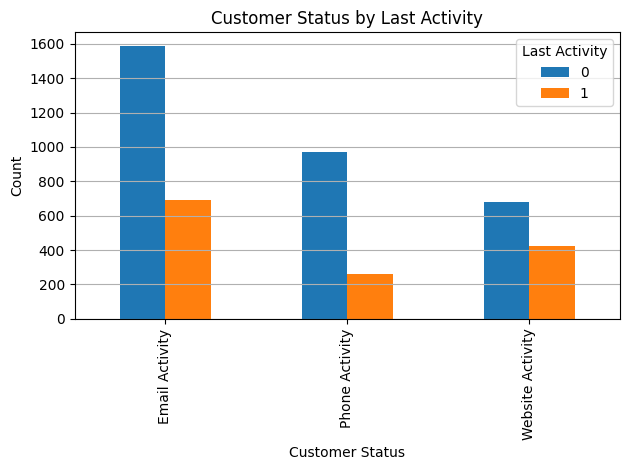

In [ ]:
last_activity_groups = df.groupby('last_activity')
last_activity_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Last Activity")
plt.legend(title="Last Activity")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Same for the case of last activity leads.

## All media and channels vs status:

#### Print Media Type1 (Newspaper Ad) vs Status:

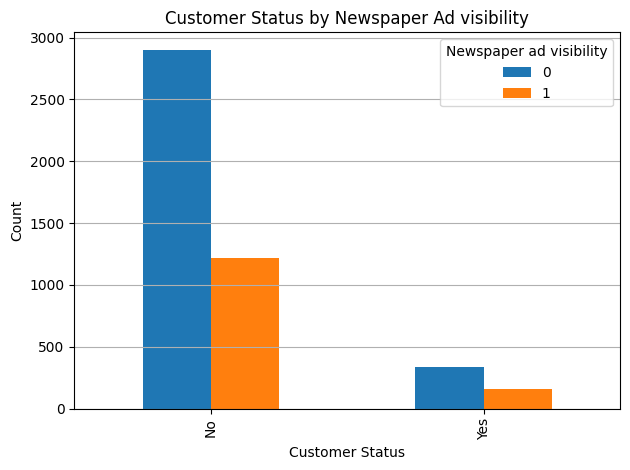

In [ ]:
newspaper_groups = df.groupby('print_media_type1')
newspaper_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Newspaper Ad visibility")
plt.legend(title="Newspaper ad visibility")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Newspaper ad leads who have not seen the ad are most likely to be **unpaid** customers and same for those who seen the ad.

#### Print Media Type2 (Magazine Ad) vs Status:

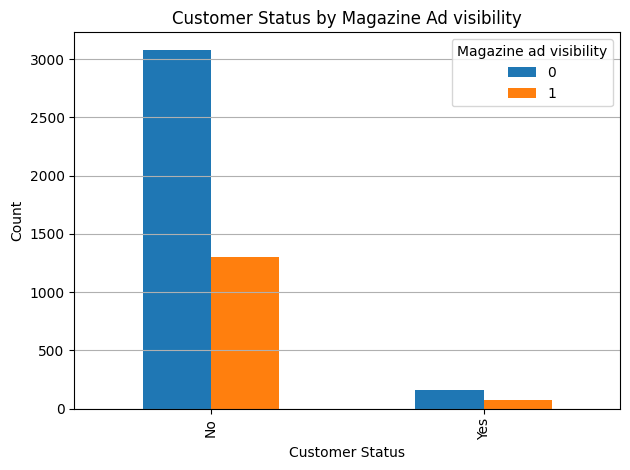

In [ ]:
magazine_groups = df.groupby('print_media_type2')
magazine_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Magazine Ad visibility")
plt.legend(title="Magazine ad visibility")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The leads who have not seen the magazine ad are more likely to be **unpaid** customers and same for those have seen the ad.

#### Digital Media vs Status:

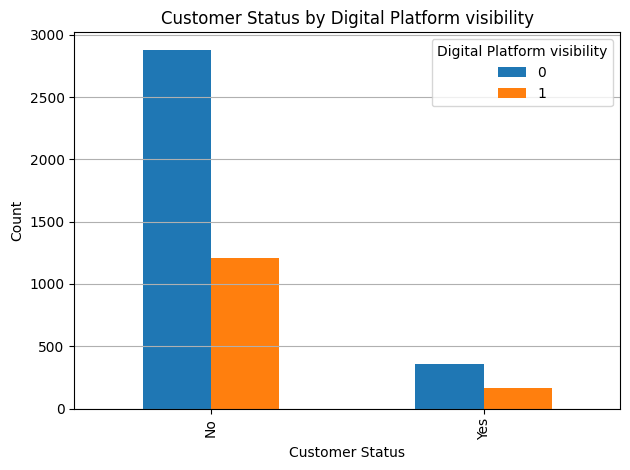

In [ ]:
digi_groups = df.groupby('digital_media')
digi_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Digital Platform visibility")
plt.legend(title="Digital Platform visibility")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Same as above graphs.

#### Educational Channels vs Status:

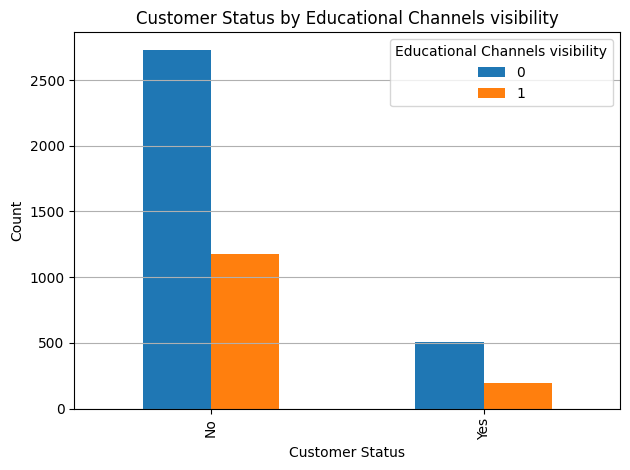

In [ ]:
educh_groups = df.groupby('educational_channels')
educh_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Educational Channels visibility")
plt.legend(title="Educational Channels visibility")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Same result as above graphs.

#### Profile Completion vs Status:

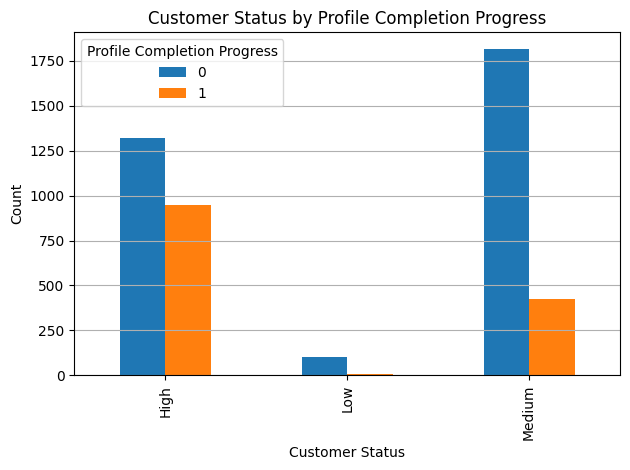

In [ ]:
prof_groups = df.groupby('profile_completed')
prof_groups['status'].value_counts().unstack().plot(kind='bar',stacked=False)

plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Status by Profile Completion Progress")
plt.legend(title="Profile Completion Progress")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Same as the other graphs.

## Encoding before Model Building:

In [ ]:
df = df.drop("ID",axis=1)

In [ ]:
df = pd.get_dummies(
    df,
    columns = df.select_dtypes(include=['object','category']).columns.tolist()
)

In [ ]:
X = df.drop("status",axis=1)
Y = df['status']

In [ ]:
X.shape

(4612, 25)

In [ ]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,0,0,1,0,1,1,...,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.320,1,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.074,1,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.057,0,0,1,0,1,1,...,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.914,0,1,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
Y.shape

(4612,)

In [ ]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=26)

In [ ]:
X_train.shape

(3228, 25)

In [ ]:
X_test.shape

(1384, 25)

In [ ]:
Y_train.shape

(3228,)

In [ ]:
Y_test.shape

(1384,)

## Building a Decision Tree model

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=26)
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=26)

In [ ]:
Y_prediction = dt_classifier.predict(X_test)

In [ ]:
accuracy_dt = accuracy_score(Y_test,Y_prediction) * 100
precision_dt = precision_score(Y_test,Y_prediction) * 100
recall_dt = recall_score(Y_test,Y_prediction) * 100
f1_score_dt = f1_score(Y_test,Y_prediction) * 100
confusion_matrix = confusion_matrix(Y_test,Y_prediction)

In [ ]:
print(f"Accuracy of classifier: {accuracy_dt:.2f}%")
print(f"Precision of classifier: {precision_dt:.2f}%")
print(f"Recall of classifier: {recall_dt:.2f}%")
print(f"F1-Score of classifier: {f1_score_dt:.2f}%")
print(f"Confusion Matrix:\n {confusion_matrix}")

Accuracy of classifier: 81.65%
Precision of classifier: 70.05%
Recall of classifier: 66.99%
F1-Score of classifier: 68.49%
Confusion Matrix:
 [[854 118]
 [136 276]]


### After GridSearchCV:

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,10,2),
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,4,8],
}

In [ ]:
grid_search = GridSearchCV(dt_classifier,param_grid,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=26),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_estimator)
print(grid_search.best_score_)
print(grid_search.best_index_)
print(grid_search.estimator)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=26)
0.869577363381093
108
DecisionTreeClassifier(random_state=26)


In [ ]:
dt_classifier_GridCV = DecisionTreeClassifier(**best_params)
dt_classifier_GridCV.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8)

In [ ]:
Y_pred_GridCV = dt_classifier_GridCV.predict(X_test)

In [ ]:
accuracy_dt_cv = accuracy_score(Y_test,Y_pred_GridCV) * 100
precision_dt_cv = precision_score(Y_test,Y_pred_GridCV) * 100
recall_dt_cv = recall_score(Y_test,Y_pred_GridCV) * 100
f1_score_dt_cv = f1_score(Y_test,Y_pred_GridCV) * 100
#confusion_matrix = confusion_matrix(Y_test,Y_pred_GridCV)

In [ ]:
print(f"Accuracy of classifier: {accuracy_dt_cv:.2f}%")
print(f"Precision of classifier: {precision_dt_cv:.2f}%")
print(f"Recall of classifier: {recall_dt_cv:.2f}%")
print(f"F1-Score of classifier: {f1_score_dt_cv:.2f}%")

Accuracy of classifier: 85.69%
Precision of classifier: 80.57%
Recall of classifier: 68.45%
F1-Score of classifier: 74.02%


## Do we need to prune the tree?

In [ ]:
Y_pred_train = dt_classifier_GridCV.predict(X_train)
Y_pred_test = dt_classifier_GridCV.predict(X_test)

training_accuracy = accuracy_score(Y_train,Y_pred_train) * 100
testing_accuracy = accuracy_score(Y_test,Y_pred_test) * 100

print(f"Training data accuracy: {training_accuracy:.2f}%")
print(f"Testing data accuracy: {testing_accuracy:.2f}%")

Training data accuracy: 88.17%
Testing data accuracy: 85.69%


Since **training data accuracy** is **higher** than **testing data accuracy**, the **model** is **overfitting**. We could either **prune** the **tree** or look for more **optimized models** such as **Random Forest Model**.

#### Feature Importance:

<Axes: xlabel='Importance', ylabel='None'>

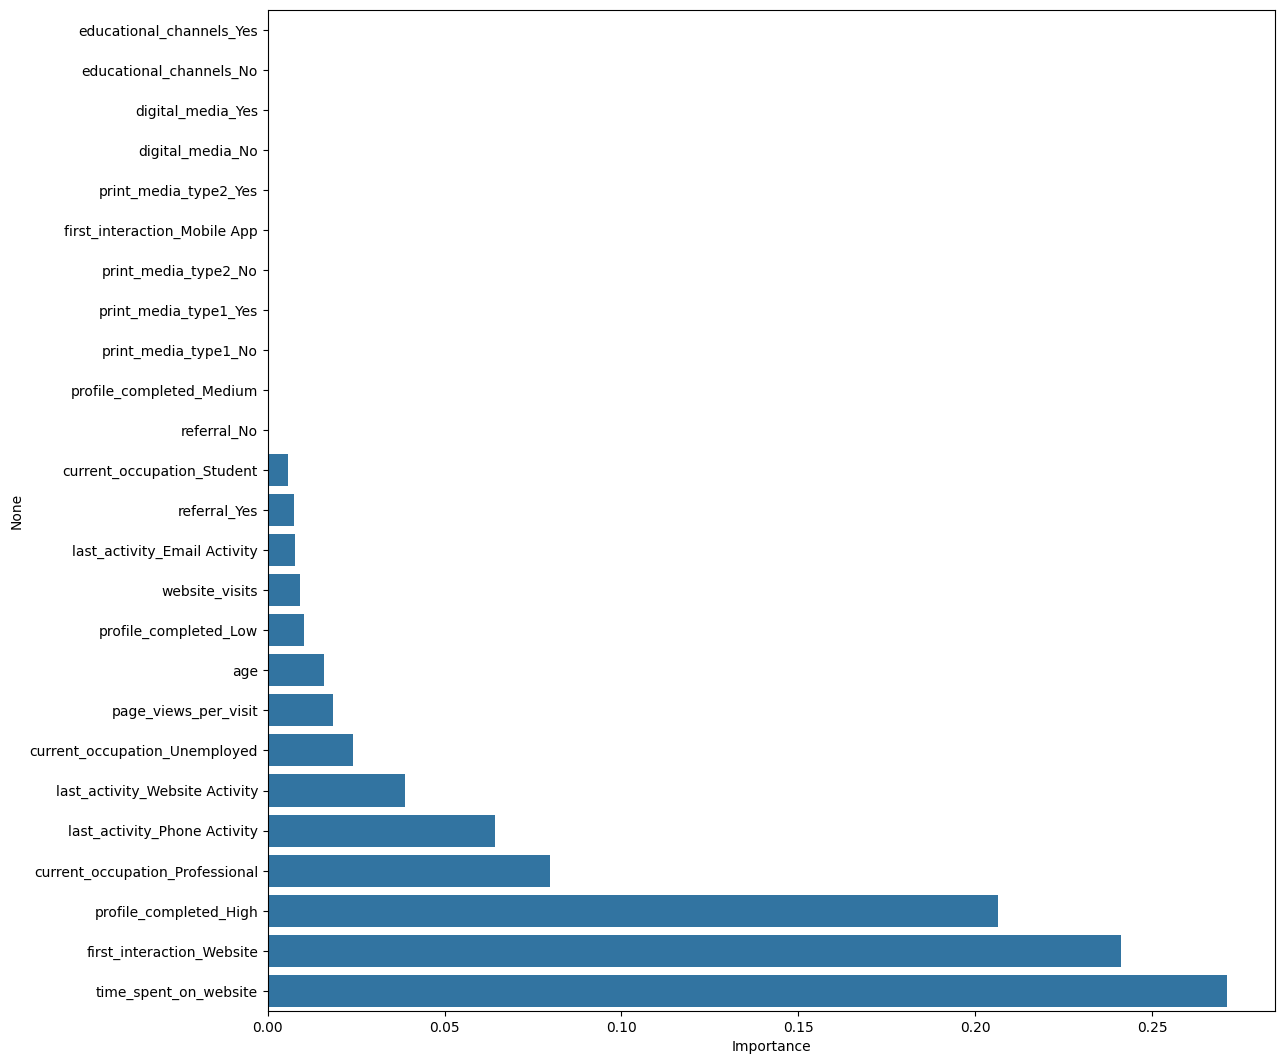

In [ ]:
importances = dt_classifier_GridCV.feature_importances_
columns  = X.columns
importance_df = pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance')
plt.figure(figsize = (13,13))
sns.barplot(data=importance_df,x=importance_df.Importance,y=importance_df.index)

The **top 5 features** in order of **descending importance** are:

**1. time_spent_on_website**

**2. first_interaction_Mobile_App**

**3. profile_completed_High**

**4. current_occupation_Professional**

**5. last_activity_Phone_Activity**

## Building a Random Forest model

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred_rfc = rfc.predict(X_test)

In [ ]:
rfc_accuracy = accuracy_score(Y_test,Y_pred_rfc) * 100
rfc_precision = precision_score(Y_test,Y_pred_rfc) * 100
rfc_recall = recall_score(Y_test,Y_pred_rfc) * 100
rfc_f1_score = f1_score(Y_test,Y_pred_rfc) * 100

In [ ]:
print(f"Accuracy: {rfc_accuracy:.2f}%")
print(f"Precision: {rfc_precision:.2f}%")
print(f"Recall: {rfc_recall:.2f}%")
print(f"F1-Score: {rfc_f1_score:.2f}%")

Accuracy: 85.40%
Precision: 78.38%
Recall: 70.39%
F1-Score: 74.17%


### After GridSearchCV:

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,10,1),
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,4,8],
}

In [ ]:
grid_search = GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_estimator)
print(grid_search.best_score_)
print(grid_search.best_index_)
print(grid_search.estimator)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}
RandomForestClassifier(max_depth=8, min_samples_split=5)
0.8732968536251711
97
RandomForestClassifier()


In [ ]:
rfc_GridCV = RandomForestClassifier(**best_params)
rfc_GridCV.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5)

In [ ]:
Y_pred_GridCV = rfc_GridCV.predict(X_test)

In [ ]:
rfc_accuracy_cv = accuracy_score(Y_test,Y_pred_GridCV) * 100
rfc_precision_cv = precision_score(Y_test,Y_pred_GridCV) * 100
rfc_recall_cv = recall_score(Y_test,Y_pred_GridCV) * 100
rfc_f1_score_cv = f1_score(Y_test,Y_pred_GridCV) * 100

In [ ]:
print(f"Accuracy of classifier: {rfc_accuracy_cv:.2f}%")
print(f"Precision of classifier: {rfc_precision_cv:.2f}%")
print(f"Recall of classifier: {rfc_recall_cv:.2f}%")
print(f"F1-Score of classifier: {rfc_f1_score_cv:.2f}%")

Accuracy of classifier: 85.48%
Precision of classifier: 80.06%
Recall of classifier: 68.20%
F1-Score of classifier: 73.66%


## Do We Need To Prune the Tree?

In [ ]:
Y_pred_train = rfc_GridCV.predict(X_train)
Y_pred_test = rfc_GridCV.predict(X_test)

training_accuracy = accuracy_score(Y_train,Y_pred_train) * 100
testing_accuracy = accuracy_score(Y_test,Y_pred_test) * 100

print(f"Training data accuracy: {training_accuracy:.2f}%")
print(f"Testing data accuracy: {testing_accuracy:.2f}%")

Training data accuracy: 89.22%
Testing data accuracy: 85.48%


#### Feature importance:

<Axes: xlabel='Importance', ylabel='None'>

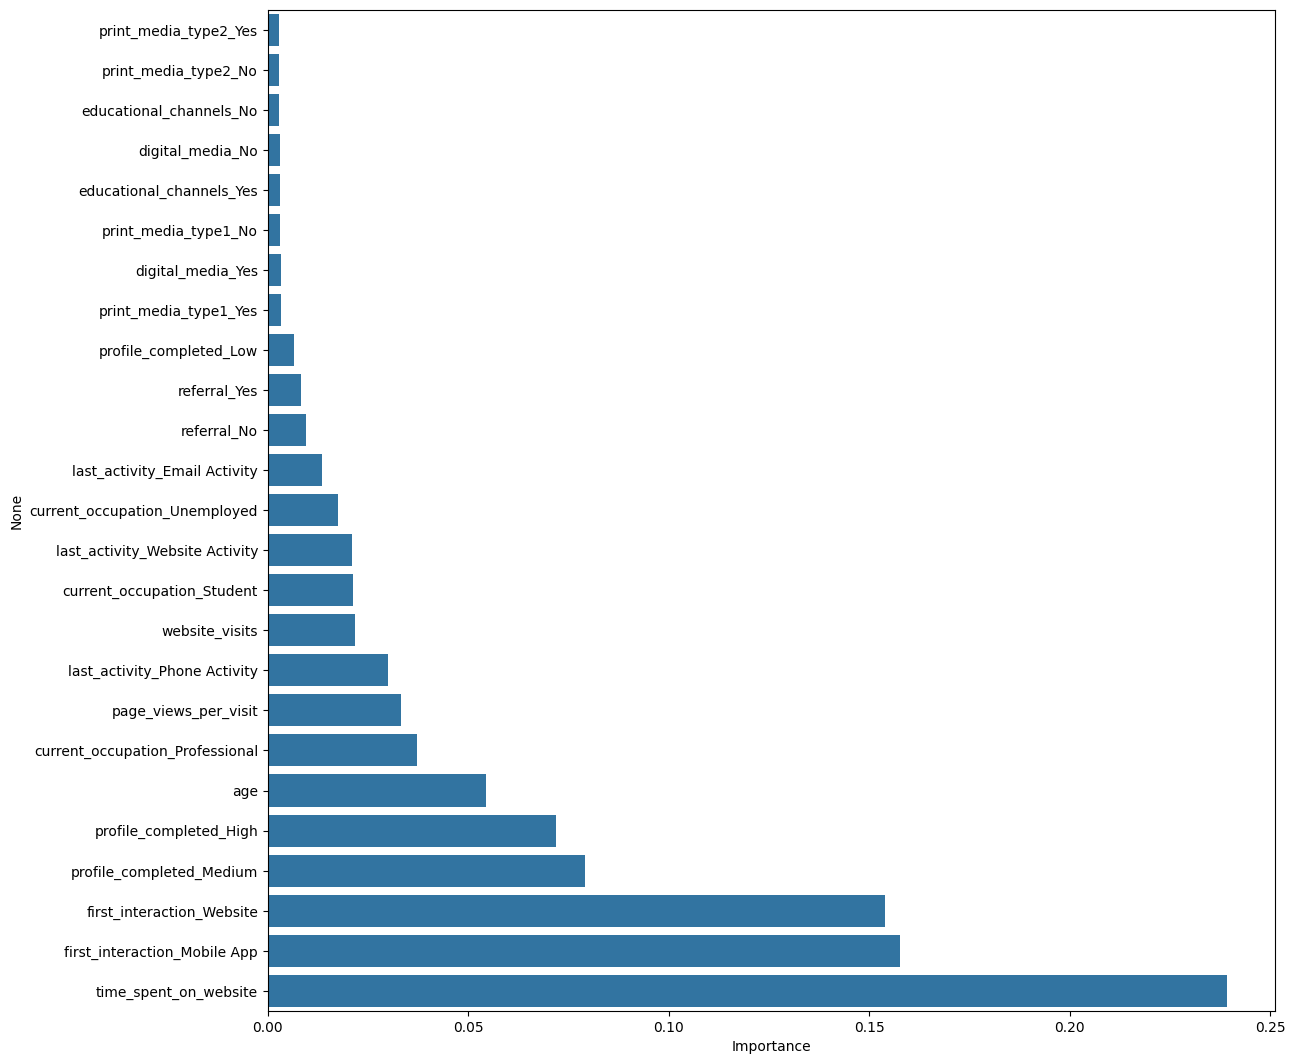

In [ ]:
importances = rfc_GridCV.feature_importances_
columns  = X.columns
importance_df = pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance')
plt.figure(figsize = (13,13))
sns.barplot(data=importance_df,x=importance_df.Importance,y=importance_df.index)

The **top 5 features** with **descending** order of **importance** are:

**1. time_spent_on_website**

**2. first_interaction_Mobile_App**

**3. first_interaction_Website**

**4. profile_completed_High**

**5. profile_completed_Medium**

## Actionable Insights and Recommendations

**Actionable insights:**

**Insights** are mentioned in the **Observations** above. However, **some features** that were **important** in the above **models** are worth to be discussed upon.

The **features** are:

**1. time_spent_on_website**

**2. first_interaction_Mobile_App**

**3. profile_completed_High**

**4. current_occupation_Professional**

**5. last_activity_Phone_Activity**

**6. first_interaction_Website**

**7. profile_completed_Medium**

**Recommendations** to **boost** conversion from **lead** to **paid** customers rather than **unpaid**. are:

**1.** **Make** the **ExtraaLearn** accessible to **other occupations** as well. **Make** it **personalized** to them.

**2.** **Segment** **leads** according to **profile completion**. Those with **high rates of profile completion** get **discounts** and **incentives** while those with **medium** and **low** are **encouraged** to **increase their completion rates**.

**3.** **Personalize** **content** and **design** for both **website** and **phone app** to **increase first interaction of lead**. **Advertise website** and **phone app** on **social media** for **greater outreach**.

**4.** **Use activity analytics** to **perform analysis** on how **leads interact to ExtraaLearn using Email, Website or Phone**. **Use chatbots** for **Website**. **Send advertisements** on **Email**. **Offer early bird discounts** or **additional resources** for **leads to convert to paid**.

**5. Do** **proper website optimization** using **SEO** and make the **website user-friendly** and **easy to access and navigate**.

**6. Use** **digital marketing techniques** to **advertise, market, retarget** courses among **leads**.